# Random Forest

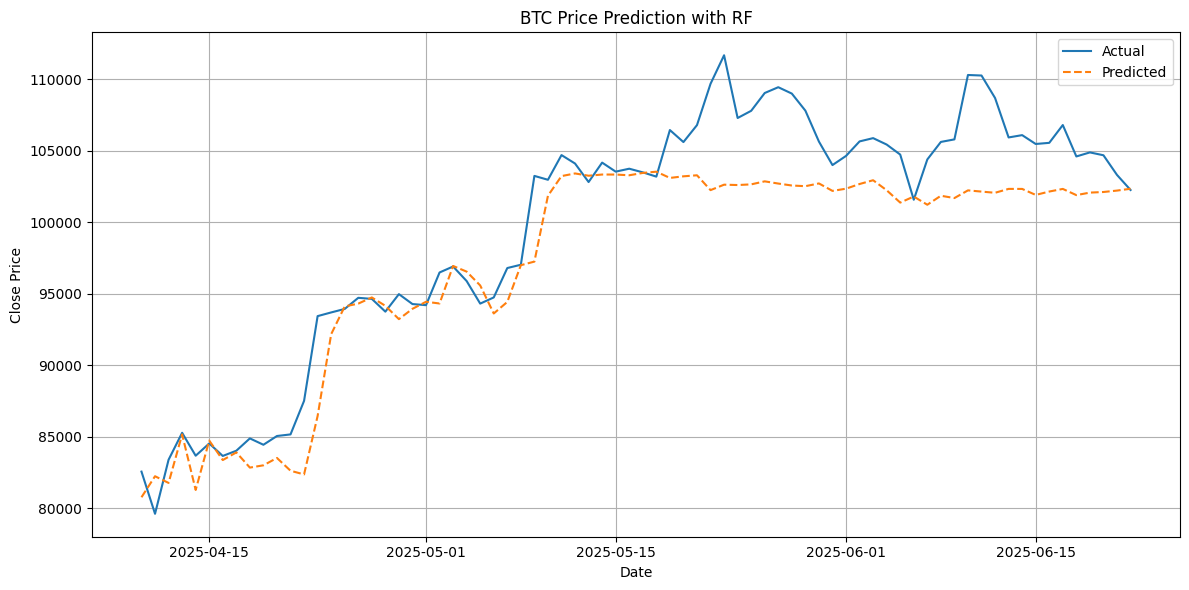

=== Model Evaluation ===
MAE           : 2,631.61
RMSE          : 3,492.56
R²            : 0.8344
Sharpe Ratio  : 0.2112
Sortino Ratio : 0.3819


In [39]:
# Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File
df = pd.read_csv("Bitcoin1D.csv", sep=';', dtype=str)
# Cleans incomplete data in the column of time, close price, volume, and market capitalization
df_clean = df[['timestamp', 'close', 'volume','marketCap']].copy()
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['close'] = pd.to_numeric(df_clean['close'], errors='coerce')
df_clean['volume'] = pd.to_numeric(df_clean['volume'], errors='coerce')
df_clean['marketCap'] = pd.to_numeric(df_clean['marketCap'], errors='coerce')
df_clean = df_clean.dropna().sort_values('timestamp').reset_index(drop=True)

# Lag feature
N_LAGS = 30  # hari
for i in range(1, N_LAGS + 1):
    df_clean[f'close_lag_{i}'] = df_clean['close'].shift(i)
    df_clean[f'volume_lag_{i}'] = df_clean['volume'].shift(i)
    df_clean[f'marketCap_lag_{i}'] = df_clean['marketCap'].shift(i)
df_model = df_clean.dropna().reset_index(drop=True)

# Feature selection
features = [col for col in df_model.columns if 'lag' in col]
X = df_model[features]
y = df_model['close']

# Train test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Model training
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Graph plot
plt.figure(figsize=(12, 6))
plt.plot(df_model['timestamp'][-len(y_test):], y_test, label='Actual')
plt.plot(df_model['timestamp'][-len(y_test):], y_pred, label='Predicted', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("BTC Price Prediction with RF")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MAE, RMSE, and R^2 parameters
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Sortino and Sharpe ratio parameters
risk_free_rate = 0.0 # Assume risk-free rate = 0
actual_returns = pd.Series(y_test).pct_change().dropna()
predicted_returns = pd.Series(y_pred).pct_change().dropna()
min_len = min(len(actual_returns), len(predicted_returns))
actual_returns = actual_returns[:min_len]
predicted_returns = predicted_returns[:min_len]

# Sharpe Ratio: mean excess return / std deviation
excess_returns = predicted_returns - risk_free_rate
sharpe_ratio = excess_returns.mean() / excess_returns.std()
# Sortino Ratio: mean excess return / std dev of negative returns
negative_returns = excess_returns[excess_returns < 0]
sortino_ratio = excess_returns.mean() / negative_returns.std()

# Parameter Output
print("=== Model Evaluation ===")
print(f"MAE           : {mae:,.2f}")
print(f"RMSE          : {rmse:,.2f}")
print(f"R²            : {r2:.4f}")
print(f"Sharpe Ratio  : {sharpe_ratio:.4f}")
print(f"Sortino Ratio : {sortino_ratio:.4f}")

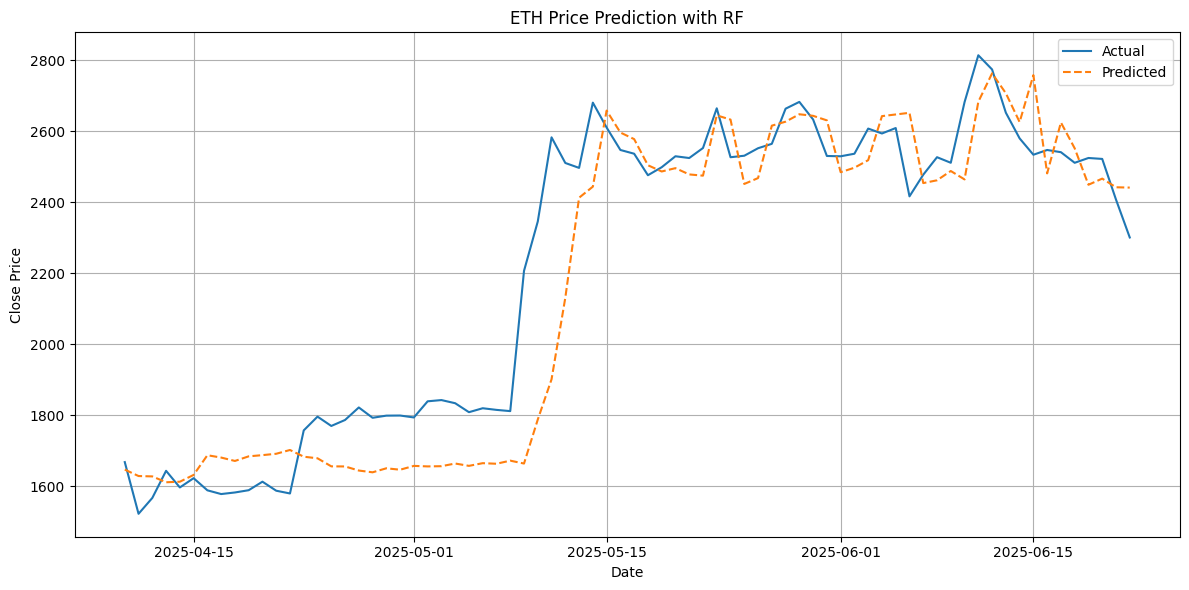

=== Model Evaluation ===
MAE           : 113.51
RMSE          : 164.88
R²            : 0.8474
Sharpe Ratio  : 0.1607
Sortino Ratio : 0.2588


In [40]:
# Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File
df = pd.read_csv("Ethereum1D.csv", sep=';', dtype=str)
# Cleans incomplete data in the column of time, close price, volume, and market capitalization
df_clean = df[['timestamp', 'close', 'volume','marketCap']].copy()
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['close'] = pd.to_numeric(df_clean['close'], errors='coerce')
df_clean['volume'] = pd.to_numeric(df_clean['volume'], errors='coerce')
df_clean['marketCap'] = pd.to_numeric(df_clean['marketCap'], errors='coerce')
df_clean = df_clean.dropna().sort_values('timestamp').reset_index(drop=True)

# Lag feature
N_LAGS = 30  # hari
for i in range(1, N_LAGS + 1):
    df_clean[f'close_lag_{i}'] = df_clean['close'].shift(i)
    df_clean[f'volume_lag_{i}'] = df_clean['volume'].shift(i)
    df_clean[f'marketCap_lag_{i}'] = df_clean['marketCap'].shift(i)
df_model = df_clean.dropna().reset_index(drop=True)

# Feature selection
features = [col for col in df_model.columns if 'lag' in col]
X = df_model[features]
y = df_model['close']

# Train test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Model training
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Graph plot
plt.figure(figsize=(12, 6))
plt.plot(df_model['timestamp'][-len(y_test):], y_test, label='Actual')
plt.plot(df_model['timestamp'][-len(y_test):], y_pred, label='Predicted', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("ETH Price Prediction with RF")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MAE, RMSE, and R^2 parameters
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Sortino and Sharpe ratio parameters
risk_free_rate = 0.0 # Assume risk-free rate = 0
actual_returns = pd.Series(y_test).pct_change().dropna()
predicted_returns = pd.Series(y_pred).pct_change().dropna()
min_len = min(len(actual_returns), len(predicted_returns))
actual_returns = actual_returns[:min_len]
predicted_returns = predicted_returns[:min_len]

# Sharpe Ratio: mean excess return / std deviation
excess_returns = predicted_returns - risk_free_rate
sharpe_ratio = excess_returns.mean() / excess_returns.std()
# Sortino Ratio: mean excess return / std dev of negative returns
negative_returns = excess_returns[excess_returns < 0]
sortino_ratio = excess_returns.mean() / negative_returns.std()

# Parameter Output
print("=== Model Evaluation ===")
print(f"MAE           : {mae:,.2f}")
print(f"RMSE          : {rmse:,.2f}")
print(f"R²            : {r2:.4f}")
print(f"Sharpe Ratio  : {sharpe_ratio:.4f}")
print(f"Sortino Ratio : {sortino_ratio:.4f}")

# Long-short Term Memory

Epoch 1/50
9/9 [==============================] - 3s 75ms/step - loss: 0.0964 - val_loss: 0.0330
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0261 - val_loss: 0.0044
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0139 - val_loss: 0.0071
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0098 - val_loss: 0.0047
Epoch 5/50
9/9 [==============================] - 0s 19ms/step - loss: 0.0089 - val_loss: 0.0045
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0087 - val_loss: 0.0040
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0067 - val_loss: 0.0041
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0075 - val_loss: 0.0041
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0077 - val_loss: 0.0043
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0084 - val_loss: 0.0040
Epoch 11/50
9/9 [============

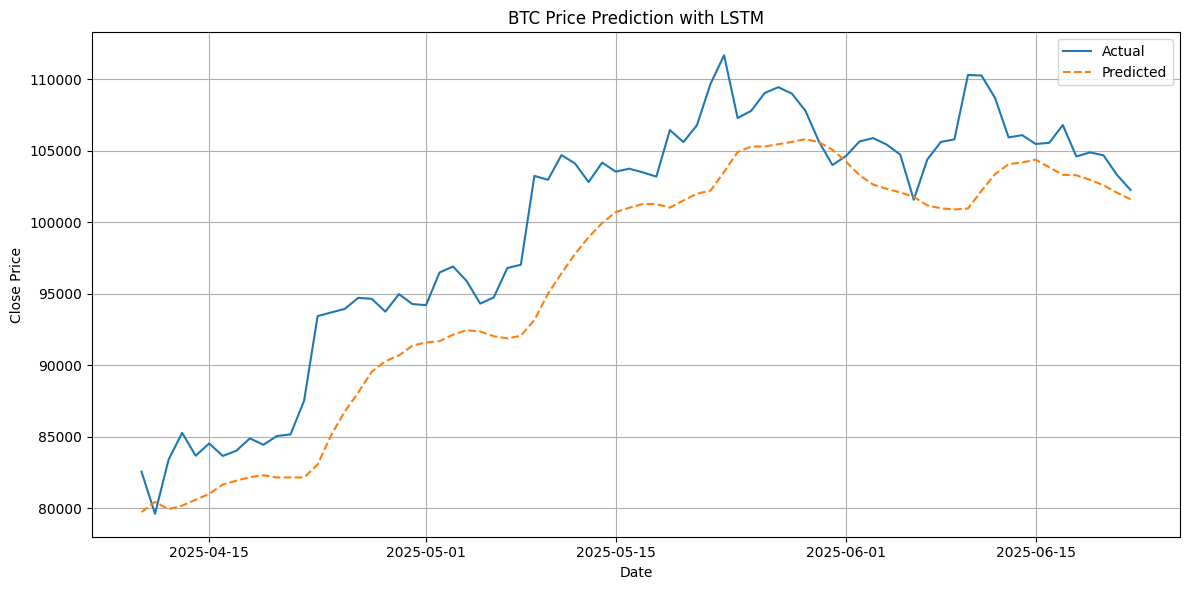

=== Model Evaluation ===
MAE           : 3,806.59
RMSE          : 4,477.56
R²            : 0.7278
Sharpe Ratio  : 0.4675
Sortino Ratio : 1.3907


In [41]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# File
df = pd.read_csv("Bitcoin1D.csv", sep=';', dtype=str)
# Cleans incomplete data in the column of time, close price, volume, and market capitalization
df_clean = df[['timestamp', 'close', 'volume','marketCap']].copy()
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['close'] = pd.to_numeric(df_clean['close'], errors='coerce')
df_clean['volume'] = pd.to_numeric(df_clean['volume'], errors='coerce')
df_clean['marketCap'] = pd.to_numeric(df_clean['marketCap'], errors='coerce')
df_clean = df_clean.dropna().sort_values('timestamp').reset_index(drop=True)

# Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_clean[['close', 'volume', 'marketCap']])

# Create LSTM sequences
N_LAGS = 30
X = []
y = []
for i in range(N_LAGS, len(scaled_data)):
    X.append(scaled_data[i - N_LAGS:i])  # 30 timesteps of 3 features
    y.append(scaled_data[i][0])  # Target: close price (first feature)
X, y = np.array(X), np.array(y)

# Train and Test
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
dates_test = df_clean['timestamp'][N_LAGS + split_index:].reset_index(drop=True)

# LSTM Model
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Model train
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.1, callbacks=[early_stop], verbose=1)

# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(np.hstack([y_pred_scaled, np.zeros((len(y_pred_scaled), 2))]))[:, 0]
y_true = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((len(y_test), 2))]))[:, 0]

# Graph Plot
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_true, label='Actual')
plt.plot(dates_test, y_pred, label='Predicted', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("BTC Price Prediction with LSTM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MAE, RMSE, and R^2 parameters
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# Sortino and Sharpe ratio parameters
risk_free_rate = 0.0 # Assume risk-free rate = 0
actual_returns = pd.Series(y_test).pct_change().dropna()
predicted_returns = pd.Series(y_pred).pct_change().dropna()
min_len = min(len(actual_returns), len(predicted_returns))
actual_returns = actual_returns[:min_len]
predicted_returns = predicted_returns[:min_len]

# Sharpe Ratio: mean excess return / std deviation
excess_returns = predicted_returns - risk_free_rate
sharpe_ratio = excess_returns.mean() / excess_returns.std()
# Sortino Ratio: mean excess return / std dev of negative returns
negative_returns = excess_returns[excess_returns < 0]
sortino_ratio = excess_returns.mean() / negative_returns.std()

# === Final Report ===
print("=== Model Evaluation ===")
print(f"MAE           : {mae:,.2f}")
print(f"RMSE          : {rmse:,.2f}")
print(f"R²            : {r2:.4f}")
print(f"Sharpe Ratio  : {sharpe_ratio:.4f}")
print(f"Sortino Ratio : {sortino_ratio:.4f}")

Epoch 1/50
9/9 [==============================] - 2s 75ms/step - loss: 0.1053 - val_loss: 0.0486
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0292 - val_loss: 0.0124
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0182 - val_loss: 0.0106
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0137 - val_loss: 0.0200
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0130 - val_loss: 0.0137
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0117 - val_loss: 0.0114
Epoch 7/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0099 - val_loss: 0.0141
Epoch 8/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0098 - val_loss: 0.0102
Epoch 9/50
9/9 [==============================] - 0s 19ms/step - loss: 0.0090 - val_loss: 0.0107
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 11/50
9/9 [============

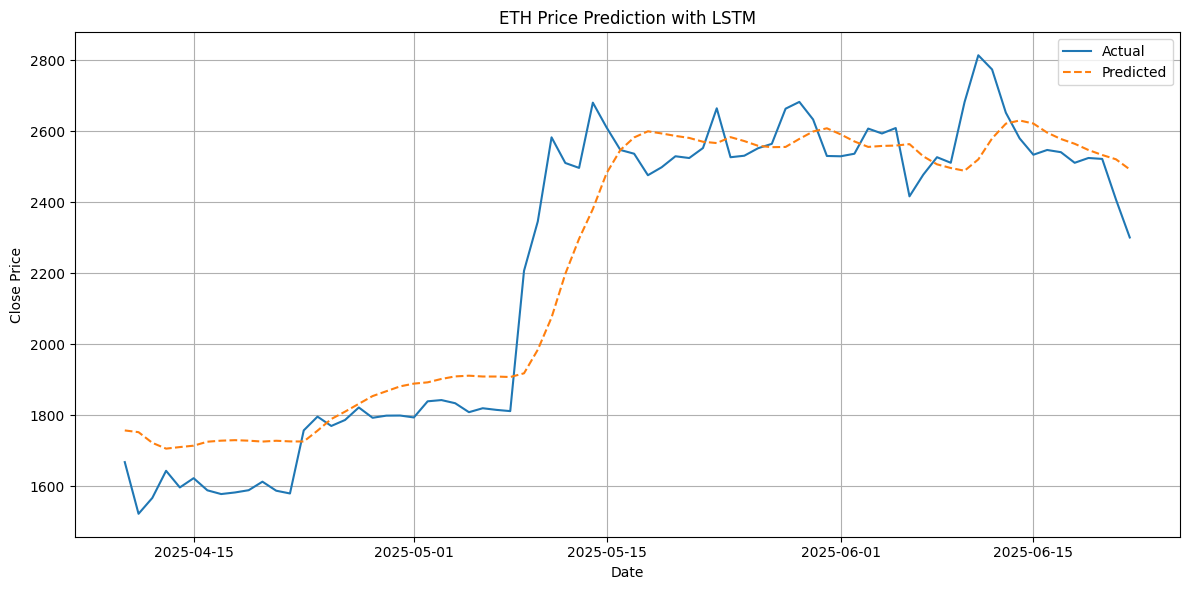

=== EVALUASI MODEL ===
MAE           : 101.89
RMSE          : 136.57
R²            : 0.8953
Sharpe Ratio  : 0.3397
Sortino Ratio : 1.2183


In [42]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# File
df = pd.read_csv("Ethereum1D.csv", sep=';', dtype=str)
# Cleans incomplete data in the column of time, close price, volume, and market capitalization
df_clean = df[['timestamp', 'close', 'volume','marketCap']].copy()
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['close'] = pd.to_numeric(df_clean['close'], errors='coerce')
df_clean['volume'] = pd.to_numeric(df_clean['volume'], errors='coerce')
df_clean['marketCap'] = pd.to_numeric(df_clean['marketCap'], errors='coerce')
df_clean = df_clean.dropna().sort_values('timestamp').reset_index(drop=True)

# Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_clean[['close', 'volume', 'marketCap']])

# Create LSTM sequences
N_LAGS = 30
X = []
y = []
for i in range(N_LAGS, len(scaled_data)):
    X.append(scaled_data[i - N_LAGS:i])  # 30 timesteps of 3 features
    y.append(scaled_data[i][0])  # Target: close price (first feature)
X, y = np.array(X), np.array(y)

# Train and Test
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
dates_test = df_clean['timestamp'][N_LAGS + split_index:].reset_index(drop=True)

# LSTM Model
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Model train
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.1, callbacks=[early_stop], verbose=1)

# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(np.hstack([y_pred_scaled, np.zeros((len(y_pred_scaled), 2))]))[:, 0]
y_true = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((len(y_test), 2))]))[:, 0]

# Graph Plot
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_true, label='Actual')
plt.plot(dates_test, y_pred, label='Predicted', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("ETH Price Prediction with LSTM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MAE, RMSE, and R^2 parameters
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# Sortino and Sharpe ratio parameters
risk_free_rate = 0.0 # Assume risk-free rate = 0
actual_returns = pd.Series(y_test).pct_change().dropna()
predicted_returns = pd.Series(y_pred).pct_change().dropna()
min_len = min(len(actual_returns), len(predicted_returns))
actual_returns = actual_returns[:min_len]
predicted_returns = predicted_returns[:min_len]

# Sharpe Ratio: mean excess return / std deviation
excess_returns = predicted_returns - risk_free_rate
sharpe_ratio = excess_returns.mean() / excess_returns.std()
# Sortino Ratio: mean excess return / std dev of negative returns
negative_returns = excess_returns[excess_returns < 0]
sortino_ratio = excess_returns.mean() / negative_returns.std()

# === Final Report ===
print("=== EVALUASI MODEL ===")
print(f"MAE           : {mae:,.2f}")
print(f"RMSE          : {rmse:,.2f}")
print(f"R²            : {r2:.4f}")
print(f"Sharpe Ratio  : {sharpe_ratio:.4f}")
print(f"Sortino Ratio : {sortino_ratio:.4f}")

# Gradient Boosting Regressor

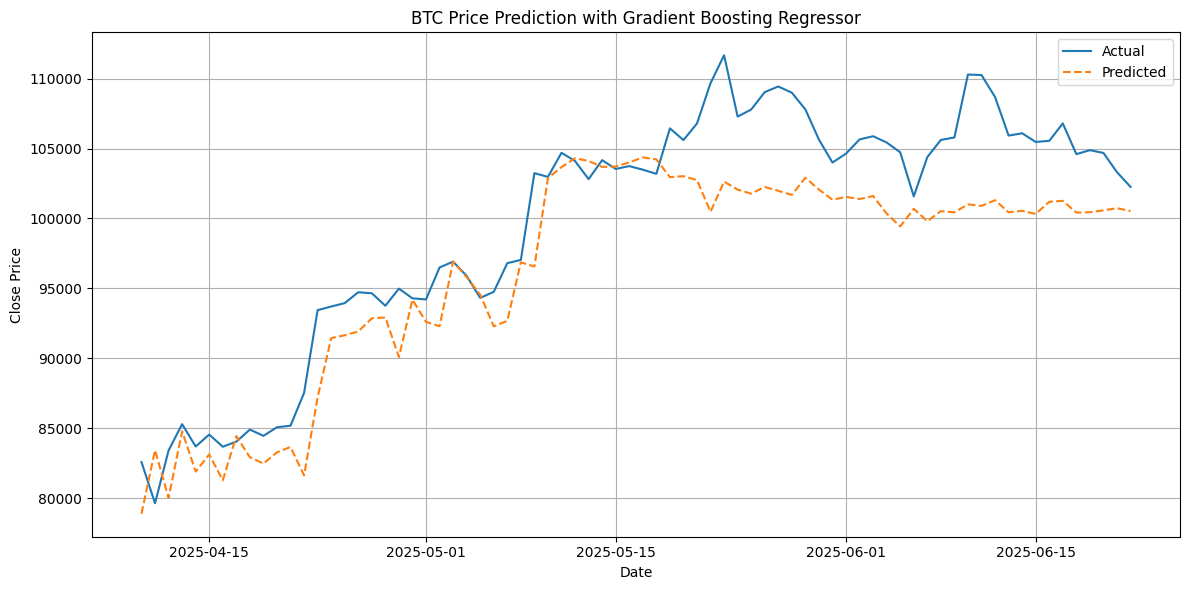

=== Model Evaluation ===
MAE           : 3,462.15
RMSE          : 4,266.02
R²            : 0.7529
Sharpe Ratio  : 0.1624
Sortino Ratio : 0.3436


In [43]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# File
df = pd.read_csv("Bitcoin1D.csv", sep=';', dtype=str)
# Cleans incomplete data in the column of time, close price, volume, and market capitalization
df_clean = df[['timestamp', 'close', 'volume', 'marketCap']].copy()
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['close'] = pd.to_numeric(df_clean['close'], errors='coerce')
df_clean['volume'] = pd.to_numeric(df_clean['volume'], errors='coerce')
df_clean['marketCap'] = pd.to_numeric(df_clean['marketCap'], errors='coerce')
df_clean = df_clean.dropna().sort_values('timestamp').reset_index(drop=True)

# Lag feature
N_LAGS = 30
for i in range(1, N_LAGS + 1):
    df_clean[f'close_lag_{i}'] = df_clean['close'].shift(i)
    df_clean[f'volume_lag_{i}'] = df_clean['volume'].shift(i)
    df_clean[f'marketCap_lag_{i}'] = df_clean['marketCap'].shift(i)
df_model = df_clean.dropna().reset_index(drop=True)

# Feature selection
features = [col for col in df_model.columns if 'lag' in col]
X = df_model[features]
y = df_model['close']
timestamps = df_model['timestamp']

# Train
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
ts_test = timestamps[-len(y_test):]

# GBR Model
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ts_test, y_test, label='Actual')
plt.plot(ts_test, y_pred, label='Predicted', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("BTC Price Prediction with Gradient Boosting Regressor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MAE, RMSE, and R^2
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
# Sortino and Sharpe ratio parameters
risk_free_rate = 0.0 # Assume risk-free rate = 0
actual_returns = pd.Series(y_test).pct_change().dropna()
predicted_returns = pd.Series(y_pred).pct_change().dropna()
min_len = min(len(actual_returns), len(predicted_returns))
actual_returns = actual_returns[:min_len]
predicted_returns = predicted_returns[:min_len]

# Sharpe Ratio: mean excess return / std deviation
excess_returns = predicted_returns - risk_free_rate
sharpe_ratio = excess_returns.mean() / excess_returns.std()
# Sortino Ratio: mean excess return / std dev of negative returns
negative_returns = excess_returns[excess_returns < 0]
sortino_ratio = excess_returns.mean() / negative_returns.std()

# Parameter Output
print("=== Model Evaluation ===")
print(f"MAE           : {mae:,.2f}")
print(f"RMSE          : {rmse:,.2f}")
print(f"R²            : {r2:.4f}")
print(f"Sharpe Ratio  : {sharpe_ratio:.4f}")
print(f"Sortino Ratio : {sortino_ratio:.4f}")

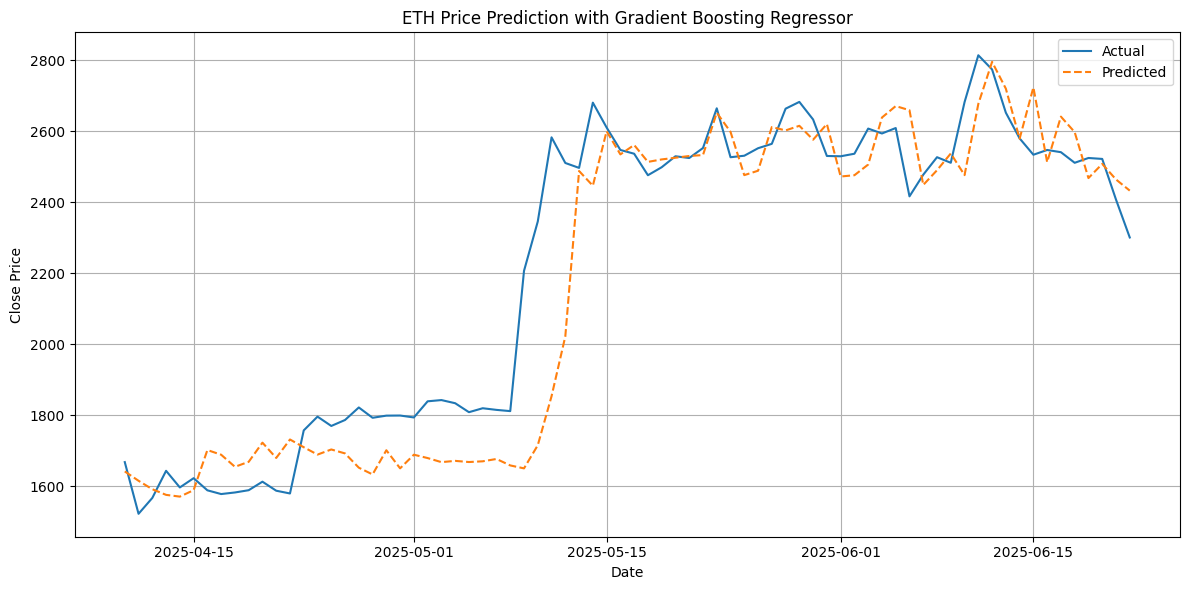

=== Model Evaluation ===
MAE           : 110.04
RMSE          : 171.82
R²            : 0.8343
Sharpe Ratio  : 0.1453
Sortino Ratio : 0.3199


In [44]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# File
df = pd.read_csv("Ethereum1D.csv", sep=';', dtype=str)
# Cleans incomplete data in the column of time, close price, volume, and market capitalization
df_clean = df[['timestamp', 'close', 'volume', 'marketCap']].copy()
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['close'] = pd.to_numeric(df_clean['close'], errors='coerce')
df_clean['volume'] = pd.to_numeric(df_clean['volume'], errors='coerce')
df_clean['marketCap'] = pd.to_numeric(df_clean['marketCap'], errors='coerce')
df_clean = df_clean.dropna().sort_values('timestamp').reset_index(drop=True)

# Lag feature
N_LAGS = 30
for i in range(1, N_LAGS + 1):
    df_clean[f'close_lag_{i}'] = df_clean['close'].shift(i)
    df_clean[f'volume_lag_{i}'] = df_clean['volume'].shift(i)
    df_clean[f'marketCap_lag_{i}'] = df_clean['marketCap'].shift(i)
df_model = df_clean.dropna().reset_index(drop=True)

# Feature selection
features = [col for col in df_model.columns if 'lag' in col]
X = df_model[features]
y = df_model['close']
timestamps = df_model['timestamp']

# Train
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
ts_test = timestamps[-len(y_test):]

# GBR Model
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ts_test, y_test, label='Actual')
plt.plot(ts_test, y_pred, label='Predicted', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("ETH Price Prediction with Gradient Boosting Regressor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MAE, RMSE, and R^2
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
# Sortino and Sharpe ratio parameters
risk_free_rate = 0.0 # Assume risk-free rate = 0
actual_returns = pd.Series(y_test).pct_change().dropna()
predicted_returns = pd.Series(y_pred).pct_change().dropna()
min_len = min(len(actual_returns), len(predicted_returns))
actual_returns = actual_returns[:min_len]
predicted_returns = predicted_returns[:min_len]

# Sharpe Ratio: mean excess return / std deviation
excess_returns = predicted_returns - risk_free_rate
sharpe_ratio = excess_returns.mean() / excess_returns.std()
# Sortino Ratio: mean excess return / std dev of negative returns
negative_returns = excess_returns[excess_returns < 0]
sortino_ratio = excess_returns.mean() / negative_returns.std()

# Parameter Output
print("=== Model Evaluation ===")
print(f"MAE           : {mae:,.2f}")
print(f"RMSE          : {rmse:,.2f}")
print(f"R²            : {r2:.4f}")
print(f"Sharpe Ratio  : {sharpe_ratio:.4f}")
print(f"Sortino Ratio : {sortino_ratio:.4f}")

# Linear Regression

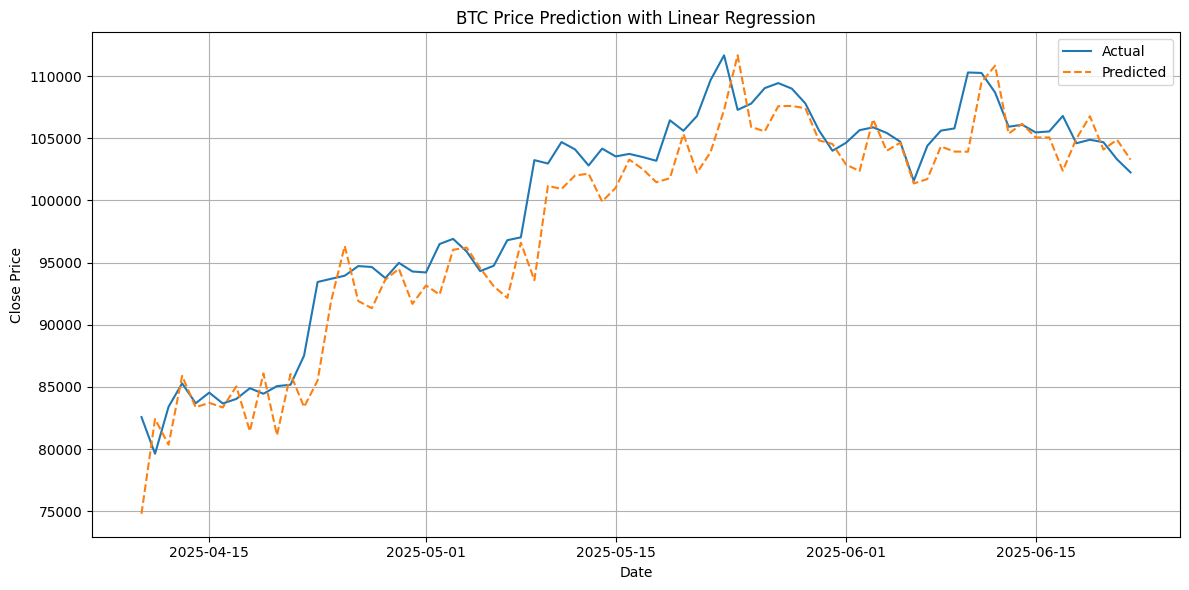

=== Model Evaluation ===
MAE           : 2,183.98
RMSE          : 2,967.65
R²            : 0.8804
Sharpe Ratio  : 0.1525
Sortino Ratio : 0.3143


In [45]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# File
df = pd.read_csv("Bitcoin1D.csv", sep=';', dtype=str)
# Cleans incomplete data in the column of time, close price, volume, and market capitalization
df_clean = df[['timestamp', 'close', 'volume', 'marketCap']].copy()
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['close'] = pd.to_numeric(df_clean['close'], errors='coerce')
df_clean['volume'] = pd.to_numeric(df_clean['volume'], errors='coerce')
df_clean['marketCap'] = pd.to_numeric(df_clean['marketCap'], errors='coerce')
df_clean = df_clean.dropna().sort_values('timestamp').reset_index(drop=True)

# Lag features
N_LAGS = 30
for i in range(1, N_LAGS + 1):
    df_clean[f'close_lag_{i}'] = df_clean['close'].shift(i)
    df_clean[f'volume_lag_{i}'] = df_clean['volume'].shift(i)
    df_clean[f'marketCap_lag_{i}'] = df_clean['marketCap'].shift(i)
df_model = df_clean.dropna().reset_index(drop=True)

# Feature selection
features = [col for col in df_model.columns if 'lag' in col]
X = df_model[features]
y = df_model['close']
timestamps = df_model['timestamp']

# Train
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
ts_test = timestamps[-len(y_test):]

# LR Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ts_test, y_test, label='Actual')
plt.plot(ts_test, y_pred, label='Predicted', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("BTC Price Prediction with Linear Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MAE, RMSE, and R^2
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
# Sortino and Sharpe ratio parameters
risk_free_rate = 0.0 # Assume risk-free rate = 0
actual_returns = pd.Series(y_test).pct_change().dropna()
predicted_returns = pd.Series(y_pred).pct_change().dropna()
min_len = min(len(actual_returns), len(predicted_returns))
actual_returns = actual_returns[:min_len]
predicted_returns = predicted_returns[:min_len]

# Sharpe Ratio: mean excess return / std deviation
excess_returns = predicted_returns - risk_free_rate
sharpe_ratio = excess_returns.mean() / excess_returns.std()
# Sortino Ratio: mean excess return / std dev of negative returns
negative_returns = excess_returns[excess_returns < 0]
sortino_ratio = excess_returns.mean() / negative_returns.std()

# Parameter Output
print("=== Model Evaluation ===")
print(f"MAE           : {mae:,.2f}")
print(f"RMSE          : {rmse:,.2f}")
print(f"R²            : {r2:.4f}")
print(f"Sharpe Ratio  : {sharpe_ratio:.4f}")
print(f"Sortino Ratio : {sortino_ratio:.4f}")


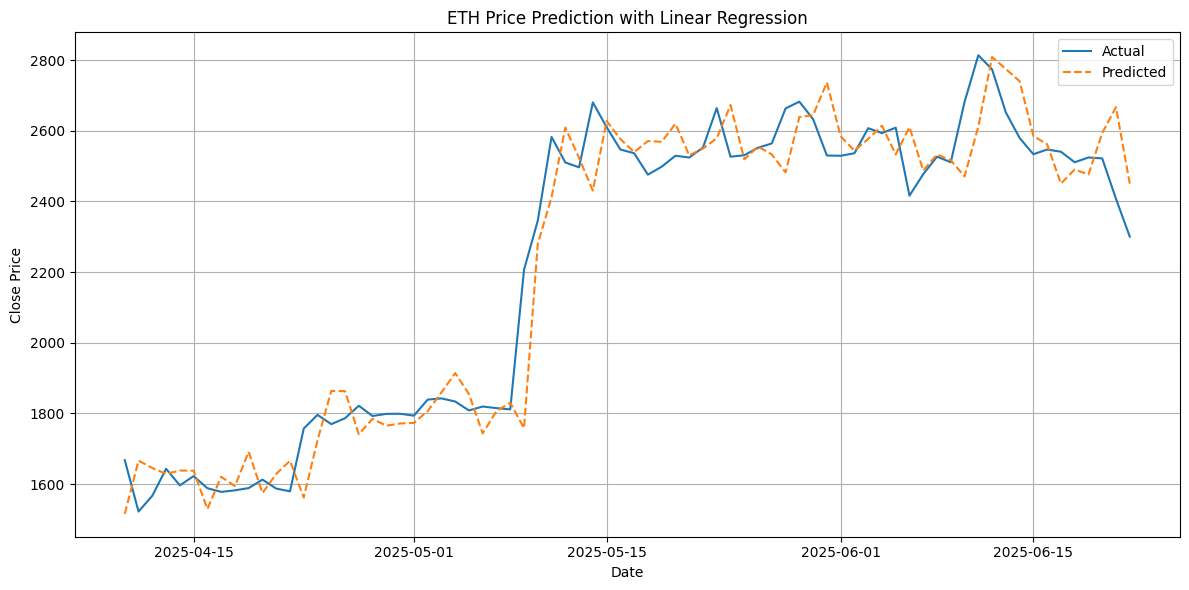

=== Model Evaluation ===
MAE           : 76.39
RMSE          : 109.25
R²            : 0.9330
Sharpe Ratio  : 0.1464
Sortino Ratio : 0.3388


In [46]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# File
df = pd.read_csv("Ethereum1D.csv", sep=';', dtype=str)
# Cleans incomplete data in the column of time, close price, volume, and market capitalization
df_clean = df[['timestamp', 'close', 'volume', 'marketCap']].copy()
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['close'] = pd.to_numeric(df_clean['close'], errors='coerce')
df_clean['volume'] = pd.to_numeric(df_clean['volume'], errors='coerce')
df_clean['marketCap'] = pd.to_numeric(df_clean['marketCap'], errors='coerce')
df_clean = df_clean.dropna().sort_values('timestamp').reset_index(drop=True)

# Lag features
N_LAGS = 30
for i in range(1, N_LAGS + 1):
    df_clean[f'close_lag_{i}'] = df_clean['close'].shift(i)
    df_clean[f'volume_lag_{i}'] = df_clean['volume'].shift(i)
    df_clean[f'marketCap_lag_{i}'] = df_clean['marketCap'].shift(i)
df_model = df_clean.dropna().reset_index(drop=True)

# Feature selection
features = [col for col in df_model.columns if 'lag' in col]
X = df_model[features]
y = df_model['close']
timestamps = df_model['timestamp']

# Train
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
ts_test = timestamps[-len(y_test):]

# LR Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ts_test, y_test, label='Actual')
plt.plot(ts_test, y_pred, label='Predicted', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("ETH Price Prediction with Linear Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MAE, RMSE, and R^2
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
# Sortino and Sharpe ratio parameters
risk_free_rate = 0.0 # Assume risk-free rate = 0
actual_returns = pd.Series(y_test).pct_change().dropna()
predicted_returns = pd.Series(y_pred).pct_change().dropna()
min_len = min(len(actual_returns), len(predicted_returns))
actual_returns = actual_returns[:min_len]
predicted_returns = predicted_returns[:min_len]

# Sharpe Ratio: mean excess return / std deviation
excess_returns = predicted_returns - risk_free_rate
sharpe_ratio = excess_returns.mean() / excess_returns.std()
# Sortino Ratio: mean excess return / std dev of negative returns
negative_returns = excess_returns[excess_returns < 0]
sortino_ratio = excess_returns.mean() / negative_returns.std()

# Parameter Output
print("=== Model Evaluation ===")
print(f"MAE           : {mae:,.2f}")
print(f"RMSE          : {rmse:,.2f}")
print(f"R²            : {r2:.4f}")
print(f"Sharpe Ratio  : {sharpe_ratio:.4f}")
print(f"Sortino Ratio : {sortino_ratio:.4f}")


# GRU

3/3 [==============================] - 0s 8ms/step


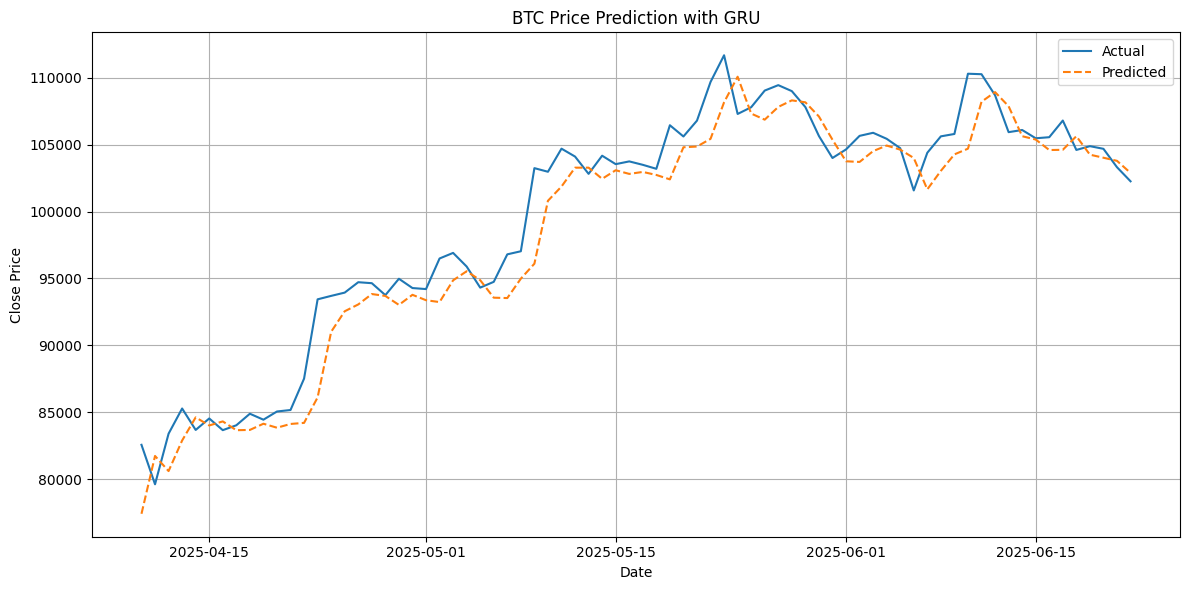

=== Model Evaluation ===
MAE           : 1,702.35
RMSE          : 2,268.39
R²            : 0.9301
Sharpe Ratio  : 0.2573
Sortino Ratio : 0.6102


In [47]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# File
df = pd.read_csv("Bitcoin1D.csv", sep=';', dtype=str)
# Cleans incomplete data in the column of time, close price, volume, and market capitalization
df_clean = df[['timestamp', 'close', 'volume', 'marketCap']].copy()
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['close'] = pd.to_numeric(df_clean['close'], errors='coerce')
df_clean['volume'] = pd.to_numeric(df_clean['volume'], errors='coerce')
df_clean['marketCap'] = pd.to_numeric(df_clean['marketCap'], errors='coerce')
df_clean = df_clean.dropna().sort_values('timestamp').reset_index(drop=True)

# Normalize features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_clean[['close', 'volume', 'marketCap']])
df_scaled = pd.DataFrame(scaled, columns=['close', 'volume', 'marketCap'])
df_scaled['timestamp'] = df_clean['timestamp']

# Sequences for GRU
N_LAGS = 30
X_seq, y_seq, ts_seq = [], [], []
for i in range(N_LAGS, len(df_scaled)):
    X_seq.append(scaled[i - N_LAGS:i])
    y_seq.append(scaled[i, 0])  # predict close price
    ts_seq.append(df_scaled['timestamp'].iloc[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)
ts_seq = np.array(ts_seq)

# Train
split_index = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]
ts_test = ts_seq[split_index:]

# GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(N_LAGS, 3), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# GRU Train
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=0)

# Predict and Rescale
y_pred_scaled = model.predict(X_test)
y_test_rescaled = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((len(y_test), 2))]))[:, 0]
y_pred_rescaled = scaler.inverse_transform(np.hstack([y_pred_scaled, np.zeros((len(y_pred_scaled), 2))]))[:, 0]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ts_test, y_test_rescaled, label='Actual')
plt.plot(ts_test, y_pred_rescaled, label='Predicted', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("BTC Price Prediction with GRU")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MAE, RMSE, and R^2
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
# Sortino and Sharpe ratio parameters
risk_free_rate = 0.0 # Assume risk-free rate = 0
actual_returns = pd.Series(y_test_rescaled).pct_change().dropna()
predicted_returns = pd.Series(y_pred_rescaled).pct_change().dropna()
min_len = min(len(actual_returns), len(predicted_returns))
actual_returns = actual_returns[:min_len]
predicted_returns = predicted_returns[:min_len]

# Sharpe Ratio: mean excess return / std deviation
excess_returns = predicted_returns - risk_free_rate
sharpe_ratio = excess_returns.mean() / excess_returns.std()
# Sortino Ratio: mean excess return / std dev of negative returns
negative_returns = excess_returns[excess_returns < 0]
sortino_ratio = excess_returns.mean() / negative_returns.std()

# Parameter Output
print("=== Model Evaluation ===")
print(f"MAE           : {mae:,.2f}")
print(f"RMSE          : {rmse:,.2f}")
print(f"R²            : {r2:.4f}")
print(f"Sharpe Ratio  : {sharpe_ratio:.4f}")
print(f"Sortino Ratio : {sortino_ratio:.4f}")


3/3 [==============================] - 0s 11ms/step


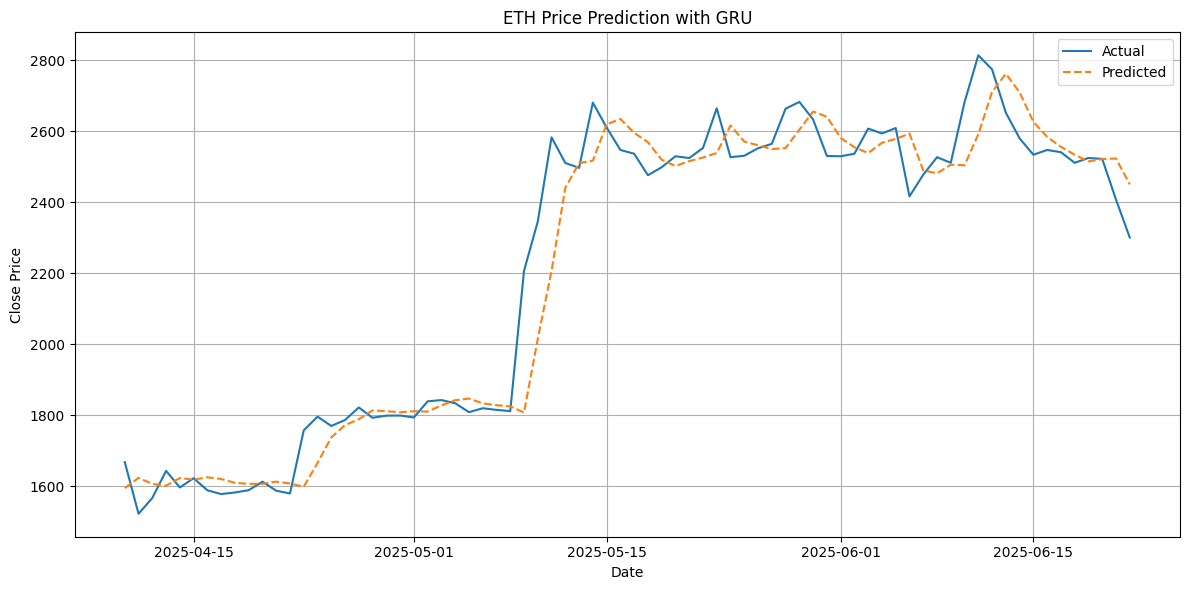

=== Model Evaluation ===
MAE           : 66.16
RMSE          : 103.79
R²            : 0.9395
Sharpe Ratio  : 0.2357
Sortino Ratio : 0.6705


In [49]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# File
df = pd.read_csv("Ethereum1D.csv", sep=';', dtype=str)
# Cleans incomplete data in the column of time, close price, volume, and market capitalization
df_clean = df[['timestamp', 'close', 'volume', 'marketCap']].copy()
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['close'] = pd.to_numeric(df_clean['close'], errors='coerce')
df_clean['volume'] = pd.to_numeric(df_clean['volume'], errors='coerce')
df_clean['marketCap'] = pd.to_numeric(df_clean['marketCap'], errors='coerce')
df_clean = df_clean.dropna().sort_values('timestamp').reset_index(drop=True)

# Normalize features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_clean[['close', 'volume', 'marketCap']])
df_scaled = pd.DataFrame(scaled, columns=['close', 'volume', 'marketCap'])
df_scaled['timestamp'] = df_clean['timestamp']

# Sequences for GRU
N_LAGS = 30
X_seq, y_seq, ts_seq = [], [], []
for i in range(N_LAGS, len(df_scaled)):
    X_seq.append(scaled[i - N_LAGS:i])
    y_seq.append(scaled[i, 0])  # predict close price
    ts_seq.append(df_scaled['timestamp'].iloc[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)
ts_seq = np.array(ts_seq)

# Train
split_index = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]
ts_test = ts_seq[split_index:]

# GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(N_LAGS, 3), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# GRU Train
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=0)

# Predict and Rescale
y_pred_scaled = model.predict(X_test)
y_test_rescaled = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((len(y_test), 2))]))[:, 0]
y_pred_rescaled = scaler.inverse_transform(np.hstack([y_pred_scaled, np.zeros((len(y_pred_scaled), 2))]))[:, 0]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ts_test, y_test_rescaled, label='Actual')
plt.plot(ts_test, y_pred_rescaled, label='Predicted', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("ETH Price Prediction with GRU")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MAE, RMSE, and R^2
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
# Sortino and Sharpe ratio parameters
risk_free_rate = 0.0 # Assume risk-free rate = 0
actual_returns = pd.Series(y_test_rescaled).pct_change().dropna()
predicted_returns = pd.Series(y_pred_rescaled).pct_change().dropna()
min_len = min(len(actual_returns), len(predicted_returns))
actual_returns = actual_returns[:min_len]
predicted_returns = predicted_returns[:min_len]

# Sharpe Ratio: mean excess return / std deviation
excess_returns = predicted_returns - risk_free_rate
sharpe_ratio = excess_returns.mean() / excess_returns.std()
# Sortino Ratio: mean excess return / std dev of negative returns
negative_returns = excess_returns[excess_returns < 0]
sortino_ratio = excess_returns.mean() / negative_returns.std()

# Parameter Output
print("=== Model Evaluation ===")
print(f"MAE           : {mae:,.2f}")
print(f"RMSE          : {rmse:,.2f}")
print(f"R²            : {r2:.4f}")
print(f"Sharpe Ratio  : {sharpe_ratio:.4f}")
print(f"Sortino Ratio : {sortino_ratio:.4f}")
